In [1]:
from traffic_simulator.structure import *

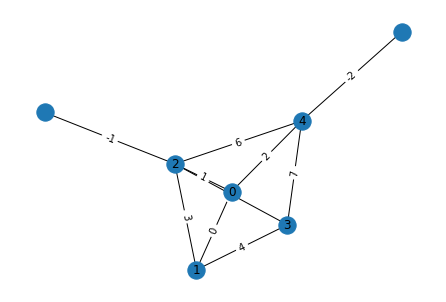

In [2]:
get_size = lambda: randint(10, 50)
get_capacities = lambda: (randint(1, 5), randint(1, 5))
get_velocity = lambda: randint(3, 10)

city = City(5, 0.75, 2, get_size, get_capacities)
city.draw()

In [3]:
print(city)

Crossing: index 0. n_streets 3. streets [0, 1, 2].
Crossing: index 1. n_streets 3. streets [0, 3, 4].
Crossing: index 2. n_streets 5. streets [1, 3, 5, 6, -1].
Crossing: index 3. n_streets 3. streets [4, 5, 7].
Crossing: index 4. n_streets 4. streets [2, 6, 7, -2].

Street: index 0. size 42. crossings (0, 1). capacities (3, 4). populations [0, 0]
Street: index 1. size 44. crossings (0, 2). capacities (3, 1). populations [0, 0]
Street: index 2. size 34. crossings (0, 4). capacities (4, 4). populations [0, 0]
Street: index 3. size 24. crossings (1, 2). capacities (1, 3). populations [0, 0]
Street: index 4. size 34. crossings (1, 3). capacities (3, 5). populations [0, 0]
Street: index 5. size 37. crossings (2, 3). capacities (5, 2). populations [0, 0]
Street: index 6. size 38. crossings (2, 4). capacities (4, 4). populations [0, 0]
Street: index 7. size 16. crossings (3, 4). capacities (3, 5). populations [0, 0]
Street: index -1. size 0. crossings (-1, 2). capacities (inf, inf). populatio

In [48]:
city.add_car(get_velocity)

In [51]:
result = city.update()
print(city)

Crossing: index 0. n_streets 3. streets [0, 1, 2].
Crossing: index 1. n_streets 3. streets [0, 3, 4].
Crossing: index 2. n_streets 5. streets [1, 3, 5, 6, -1].
Crossing: index 3. n_streets 3. streets [4, 5, 7].
Crossing: index 4. n_streets 4. streets [2, 6, 7, -2].

Street: index 0. size 42. crossings (0, 1). capacities (3, 4). populations [0, 0]
Street: index 1. size 44. crossings (0, 2). capacities (3, 1). populations [1, 0]
Street: index 2. size 34. crossings (0, 4). capacities (4, 4). populations [0, 1]
Street: index 3. size 24. crossings (1, 2). capacities (1, 3). populations [0, 0]
Street: index 4. size 34. crossings (1, 3). capacities (3, 5). populations [2, 0]
Street: index 5. size 37. crossings (2, 3). capacities (5, 2). populations [1, 0]
Street: index 6. size 38. crossings (2, 4). capacities (4, 4). populations [1, 0]
Street: index 7. size 16. crossings (3, 4). capacities (3, 5). populations [0, 0]
Street: index -1. size 0. crossings (-1, 2). capacities (inf, inf). populatio

In [36]:
result

(5,
 10,
 5,
 [(2, 5, 5, 93), (3, 2, 5, 91), (4, 5, 3, 59), (5, 4, 3, 42), (6, 6, 4, 76)])

In [7]:
city.cars[-1].destiny

IndexError: list index out of range